# Statistical Learning Theory. Exam project

Here is the description of what you need to do at your final project

<b>Deadline:</b> 27.12.2018, 9 a.m. (there would be no soft deadline)

<b>How to hang in?</b> You need to put your Jupyter Notebook and dataset to GitHub repo and send link in Telegram to <b>@CroCode</b>

<b>NB!</b> Please, write comments at your code: I need to somehow understand what are you doing

## Choosing dataset

At first you need to choose the dataset for analysis. I want you to find the problem that would be interesting for you (maybe something related to your area of work etc.)

I suggest you to use 2 most popular sources of data:

1) UCI machine learning repository https://archive.ics.uci.edu/ml/datasets.html

2) Kaggle https://www.kaggle.com/datasets

And to make this task more interesting, I ask you not to choose the same datasets. Please, fill in the Google form with your name and chosen dataset: https://docs.google.com/spreadsheets/d/1Kv7TY5mTgxWASdcmmHAE8H1i7pSLHXtVsllio7RQFPU/edit?usp=sharing

## Preprocessing data

You need to show that you understand correctly how the data should be preprocessed, i.e. what to do with categorical data, missing values etc. I ask you to explain why you did this very preprocessing (take into account that preprocessing often depends on model type)

<b>Total:</b> <i>2 points</i>

In [1]:
# Sklearn
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix   
from sklearn.model_selection import GridSearchCV 
from sklearn.manifold import TSNE
# Keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns
# Others
import gensim
import nltk
from nltk import FreqDist
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import snowballstemmer
import collections
import pandas as pd
import numpy as np
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from gensim.models.word2vec import Word2Vec


Using TensorFlow backend.


In [2]:
#Import data
df = pd.read_csv('web_comments.csv')
X = df['comments']
Y = df['labels']

## Remove words with the frequency below 1
frequency = defaultdict(int)
for text in X:
    for token in text:
        frequency[token] += 1
X = [[token for token in text if frequency[token] > 1]
         for text in X]

#Data processing
def clean_text(text):    
    ## Remove puncuation
    text = text.translate(string.punctuation)    
    ## Convert words to lower case and split them
    text = text.lower().split() 
     
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text
# apply the above function to df['text']
X = df['comments'].map(lambda x: clean_text(x))

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### Tokenize and Sequence Model

In [3]:
### Create training sequence
vocabulary_size = 5000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(X_train)
sequences_training = tokenizer.texts_to_sequences(X_train)
data = pad_sequences(sequences_training, maxlen=50)

### Create test sequence
vocabulary_size = 5000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(X_test)
sequences_test = tokenizer.texts_to_sequences(X_test)
data_test = pad_sequences(sequences_test, maxlen=50)

print(data.shape)
print(data_test.shape)

(2400, 50)
(600, 50)


### Bag of Words Model

In [5]:
vectorizer = CountVectorizer(max_features = 500) 
train_data_features = vectorizer.fit_transform(X_train).toarray()
test_data_features = vectorizer.fit_transform(X_test).toarray()
train_data_features.shape

(2400, 500)

### Word2Vector Model

In [6]:
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

### Notation:
    
I tried many ways for feature extraction of the text, but the results were not satisfactory. Always sth wrong with the Word2Vector Model, moreover, thers is no significant accuracy differences between the Bag of Words Model and Tokenize and Sequence Model, so just use the Tokenize and Sequence Model with faster convergence.

## Model fitting

Depending on chosen problem you can try to use several models, fit them and choose the best.

Here you need to demonstrate the knowledge of what parameters and how you should fit, how to choose features. In addition it would be fine if you come up with some heuristic or regularization that can make your model quality better.

<b>Total:</b> <i>3 points (+ 1 extra point for heuristic or/and regularization)</i>

### Model Introduction
    
Sentiment analysis is a common application of Natural Language Processing (NLP) methodologies, particularly classification, whose goal is to extract the emotional content in text. 
    
Based on a large amount of materials，The text sentiment classification is mainly divided into two steps: 

1. Training, which mainly learns the rules of the classification model according to the training set. 

2. Classification, use the test set to assess the accuracy of the classification.

This project focuses on the use of 

#### Traditional machine learning models:

1. Stochastic Logistic Regression

2. Support vector machine

#### Deep learning models: 

1. A Neural Network with LSTM

2. A Convolutional Neural Network with LSTM

3. A Recurrent Neural Network with LSTM

to do text sentiment classification, in an attempt to explore the differences and advantages and disadvantages of multiple models in nlp processing.

### Classification Algorithm(Logistic Regression)

In [6]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model.logistic import LogisticRegression  
pipeline = Pipeline([  
('vect', TfidfVectorizer(stop_words='english')),   
('clf', LogisticRegression())  
])  
parameters = {  
'vect__max_df': (0.25, 0.5),  
'vect__ngram_range': ((1, 1), (1, 2)),  
'vect__use_idf': (True, False),  
'clf__C': (0.1, 1, 10),  
}  
grid_search = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1, scoring='accuracy')  
grid_search.fit(X_train, Y_train)  
print('Best Effect：%0.3f' % grid_search.best_score_)  
print('Optimal parameter combination：')  
best_parameters = grid_search.best_estimator_.get_params()  
for param_name in sorted(parameters.keys()):  
    print('\t%s: %r' % (param_name, best_parameters[param_name]))  

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.6s


Best Effect：0.801
Optimal parameter combination：
	clf__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 1)
	vect__use_idf: True


[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:    7.1s finished
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



### Support vector machine


In [ ]:
clf_param = (('linear', 0.1), ('linear', 0.5), ('linear', 1), ('linear', 2),
                ('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
                ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100))

for i, param in enumerate(clf_param):
        clf = svm.SVC(C=param[1], kernel=param[0])
        if param[0] == 'rbf':
            clf.gamma = param[2]
            title = u'Gaussian kernal，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
        else:
            title = u'Linear kernal，C=%.1f' % param[1]

        clf.fit(data, Y_train)
        y_hat = clf.predict(data)
        show_accuracy(y_hat, Y_train)  # Accuracy

### Notation:
    
Too long to waiting, my computer has crashed several times, thus just use the simple SVM model.

In [7]:
clf = svm.SVC(C=2.0, probability=True)
clf.fit(data, Y_train)
print('Test Accuracy is: %.2f' % clf.score(data, Y_train))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Test Accuracy is: 0.99


### A Neural Network with LSTM

The network starts with an embedding layer. The layer lets the system expand each token to a more massive vector, allowing the network to represent a word in a meaningful way. The layer takes 7000 as the first argument, which is the size of our vocabulary, and 100 as the second input parameter, which is the dimension of the embedding. The third parameter is the input_length of 50, which is the length of each comment sequence.

In [4]:
model_nn = Sequential()
model_nn.add(Embedding(5000, 100, input_length=50))##Embedding is embedded layer
model_nn.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))#The LSTM is the hidden layer of the sequence encoding
model_nn.add(Dense(1, activation='sigmoid'))#The Dense is the output layer that generates the classification result
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_nn.summary()
model_nn.fit(data, Y_train, validation_split=0.4, epochs=5,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
Train on 1440 samples, validate on 960 samples
Epoch 1/5
1440/1440 [==============================] - 7s 5ms/step - loss: 0.6867 - acc: 0.5639 - val_loss: 0.6704 - val_acc: 0.6333
Epoch 2/5
1440/1440 [==============================] - 5s 4ms/step - loss: 0.5367 - acc: 0.8187 - val_loss: 0.4750 - val_acc: 0.7802
Epoch 3/5
1440/1440 [==============================] - 5s 4ms/step - loss: 0.2404 - acc

### A Convolutional Neural Network with LSTM

The CNN LSTM architecture involves using Convolutional Neural Network (CNN) layers for feature extraction on input data combined with LSTMs to support sequence prediction.

In [8]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv1D(100, 5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=4))
model_cnn.add(LSTM(100))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit train data
model_cnn.summary()
model_cnn.fit(data, Y_train, validation_split=0.4, epochs = 10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 100)           50100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 630,601
Trainable params: 130,601
Non-trainable params: 500,000
________________________________________________________________

### A Recurrent Neural Network with LSTM

Step 1 is to map words to word embeddings. Step 2 is the RNN that receives a sequence of vectors as input and considers the order of the vectors to generate prediction.

In [9]:
max_len=50
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(5000, 100,input_length=max_len)(inputs) 
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    # Dense implements the operation: output = activation(dot(input, kernel) + bias)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model_rnn = RNN()
model_rnn.summary()
model_rnn.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model_rnn.fit(data, Y_train,batch_size=400,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 50)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 50, 100)           500000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                42240     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

## Quality measuring and results

Provide several relevant metrics of model quality. Make conlusion upon the model, overfitting etc.

<b>Total:</b> <i>2 points</i>

In [55]:
print("=============================================================================================")
print("Logistic Regression")
predictions = grid_search.predict(X_test)  
print('Accuracy：', accuracy_score(Y_test, predictions))  
print('Confusion matrix：', confusion_matrix(Y_test, predictions))  
print('Classification report：', classification_report(Y_test, predictions))   
print("=============================================================================================")
print("Support vector machine")
predictions_svm = clf.predict(data_test)  
print('Accuracy：', accuracy_score(Y_test, predictions_svm))  
print('Confusion matrix：', confusion_matrix(Y_test, predictions_svm))  
print('Classification report：', classification_report(Y_test, predictions_svm)) 
print("=============================================================================================")
print("A Neural Network with LSTM")
predictions_nn = model_nn.predict(data_test)  
list = []          
for i in range(1,601):
    if predictions_nn[i-1]<0.5:
        list.append(0) 
    else:
        list.append(1)
          
print('Accuracy：', accuracy_score(Y_test, list))  
print('Confusion matrix：', confusion_matrix(Y_test, list))  
print('Classification report：', classification_report(Y_test, list)) 
print("=============================================================================================")
print("A Convolutional Neural Network with LSTM")
accr4 = model_cnn.evaluate(data_test,Y_test)
print('Test set\n  Loss of rnn_model: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))
print("=============================================================================================")
print("A Recurrent Neural Network with LSTM")
predictions_rnn = model_rnn.predict(data_test)  
list_2 = []          
for i in range(1,601):
    if predictions_nn[i-1]<0.5:
        list_2.append(0) 
    else:
        list_2.append(1)
          
print('Accuracy：', accuracy_score(Y_test, list_2))  
print('Confusion matrix：', confusion_matrix(Y_test, list_2))  
print('Classification report：', classification_report(Y_test, list_2)) 
print("=============================================================================================")

Logistic Regression
Accuracy： 0.8066666666666666
Confusion matrix： [[230  65]
 [ 51 254]]
Classification report：               precision    recall  f1-score   support

           0       0.82      0.78      0.80       295
           1       0.80      0.83      0.81       305

   micro avg       0.81      0.81      0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

Support vector machine
Accuracy： 0.5166666666666667
Confusion matrix： [[282  13]
 [277  28]]
Classification report：               precision    recall  f1-score   support

           0       0.50      0.96      0.66       295
           1       0.68      0.09      0.16       305

   micro avg       0.52      0.52      0.52       600
   macro avg       0.59      0.52      0.41       600
weighted avg       0.60      0.52      0.41       600

A Neural Network with LSTM
Accuracy： 0.545
Confusion matrix： [[170 125]
 [148 157]]
Classification report：           

### Model Evaluation

As we can see from the results, the accuracy rate of Logistic Regression model is maintaining at a fairly high level in both the training set and the test set, which proves that the model has lower variances and bias. 

SVM make the best predictions on the training set. However, in the test set, the accuracy dropped to the half, which proved that the model had an overfitting problem.

As for the three Neural Networks, although the accuracy of the three models in the training set remained at around 90%, however, the accuracy of the three all fell to 50% in the test set. It proves that for the three neural network model, I built it unsuccessfully. I don't fully understand the parameters and the number of layers of the complicated models, so it caused the over-fitting effect of the model.(((

## Visualization

It's really good data scientist's character - to be able to provide fine visualization. So that you need to visualize different steps of your research: interesting moments from data distributon, quality metrics, feature importances etc. Please, try to make nice figures - for the sake of that you can look through tutorials on Matplotlib, Seaborn, Plotly etc.

<b>Total:</b> <i>3 points</i>

### Visualize Neural Network with LSTM Training History

In [1]:
## Unfortunately, I can't install the graphviz, so the model will be presented on your computer.
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_nn).create(prog='dot', format='svg'))


Using TensorFlow backend.


NameError: name 'model_nn' is not defined

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



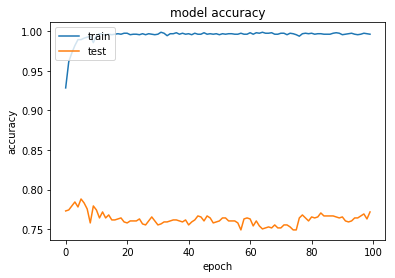

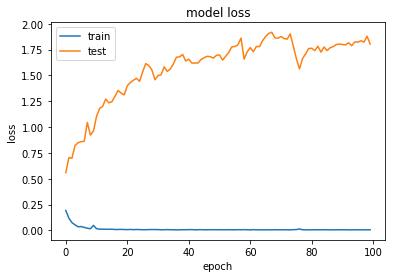

In [104]:
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model_nn.fit(data, Y_train, validation_split=0.33, epochs=100, batch_size=40, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualize CNN with LSTM Training History

In [ ]:
SVG(model_to_dot(model_cnn).create(prog='dot', format='svg'))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


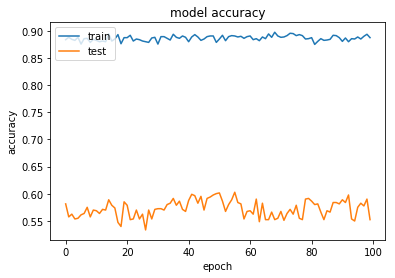

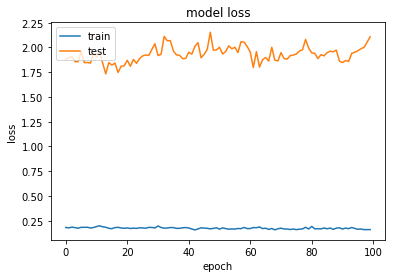

In [107]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model_cnn.fit(data, Y_train, validation_split=0.33, epochs=100, batch_size=40, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualize RNN with LSTM Training History

In [ ]:
SVG(model_to_dot(model_rnn).create(prog='dot', format='svg'))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


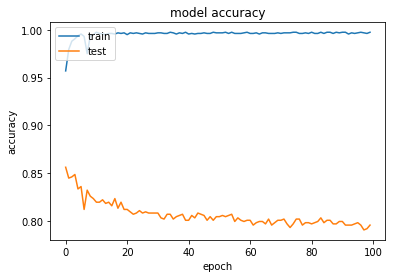

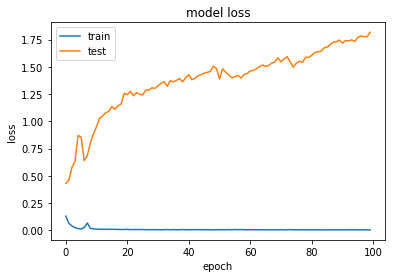

In [113]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model_rnn.fit(data, Y_train, validation_split=0.33, epochs=100, batch_size=40, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Comparison of Models Accuracy

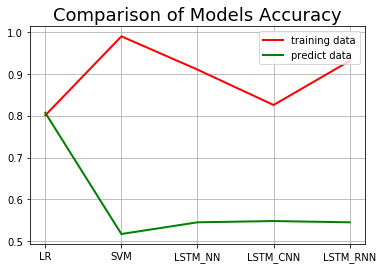

In [60]:
model_na = ["LR","SVM","LSTM_NN","LSTM_CNN","LSTM_RNN"]
acc_train=[0.801,0.99,0.9104,0.8257,0.9312]
acc_test=[0.807,0.517,0.545,0.548,0.545]
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(model_na, acc_train, 'r-', linewidth=2, label=u'training data')
plt.plot(model_na, acc_test, 'g-', linewidth=2, label=u'predict data')
plt.title(u'Comparison of Models Accuracy', fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()

### WordCloud

(-0.5, 399.5, 199.5, -0.5)

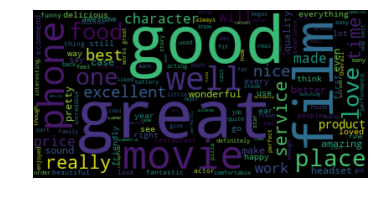

In [104]:
pos=open('pos_comments.txt').read()
wordcloud = WordCloud().generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

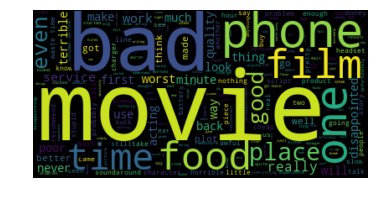

In [121]:
neg = open('neg_comment.txt',errors='ignore').read()
wordcloud = WordCloud().generate(neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


<table><tr><td bgcolor=orange> Project Summary orange </td></tr></table>

NLP is an important direction in the field of computer science and artificial intelligence. Since my previous major was psychology, I am very interested in the interaction between machine and human emotions. Therefore, this project selected the text sentiment analysis as the theme. To be honest, the results of each model are not satisfactory. Although I have a certain understanding of each model, however, in the real construction of every model, its parameter tunning and model construction are relatively difficult. Moreover, since the text is different from the number, in the feature extraction process, I am also relatively unfamiliar, resulting in the model results are not ideal. I hope that in the future study, based on the true understanding of each model theory, I will enhance my practical experience.

## HINT

For well known datasets (especially on Kaggle) guys usually share kernels - Jupyter Notebooks with ideas of solution. I don't advise you to take some interesting solution and say that it's yours - I'm just telling you that sometimes it could be helpful to study others' thoughts in order to get idea for new heuristic :)